In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train .csv')

In [3]:
df.head().T

,0,1,2,3,4
employee_id,65438,65141,7513,2542,48945
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other
no_of_trainings,1,1,1,2,1
age,35,30,34,39,45
previous_year_rating,5.0,5.0,3.0,1.0,3.0
length_of_service,8,4,7,10,2


In [4]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [5]:
obj_df = df.select_dtypes(include=['object']).copy()
num_df = df.select_dtypes(include=['int64']).copy()

In [6]:
obj_df.head().T

,0,1,2,3,4
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other


In [7]:
num_df.head().T

,0,1,2,3,4
employee_id,65438,65141,7513,2542,48945
no_of_trainings,1,1,1,2,1
age,35,30,34,39,45
length_of_service,8,4,7,10,2
KPIs_met >80%,1,0,0,0,0
awards_won?,0,0,0,0,0
avg_training_score,49,60,50,50,73
is_promoted,0,0,0,0,0


In [8]:
obj_df.isnull().sum()

department                0
region                    0
education              2409
gender                    0
recruitment_channel       0
dtype: int64

In [9]:
num_df.isnull().sum()

employee_id           0
no_of_trainings       0
age                   0
length_of_service     0
KPIs_met >80%         0
awards_won?           0
avg_training_score    0
is_promoted           0
dtype: int64

In [10]:
#IQR
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

employee_id           39060.75
no_of_trainings           0.00
age                      10.00
length_of_service         4.00
KPIs_met >80%             1.00
awards_won?               0.00
avg_training_score       25.00
is_promoted               0.00
dtype: float64


In [11]:
#Outliers
num_df_out = num_df[~((num_df < (Q1 - 1.5 * IQR)) |(num_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
num_df_out.shape

(36477, 8)

In [13]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
label_df = obj_df.apply(labelencoder.fit_transform)

In [14]:
label_df.head().T

,0,1,2,3,4
department,7,4,7,7,8
region,31,14,10,15,18
education,2,0,0,0,0
gender,0,1,1,1,1
recruitment_channel,2,0,2,0,0


In [15]:
new_df = pd.concat([label_df, num_df], axis=1)

In [16]:
new_df.isna().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
employee_id            0
no_of_trainings        0
age                    0
length_of_service      0
KPIs_met >80%          0
awards_won?            0
avg_training_score     0
is_promoted            0
dtype: int64

In [17]:
new_df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [18]:
X = new_df.drop(['is_promoted'], axis=1)
y = new_df['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

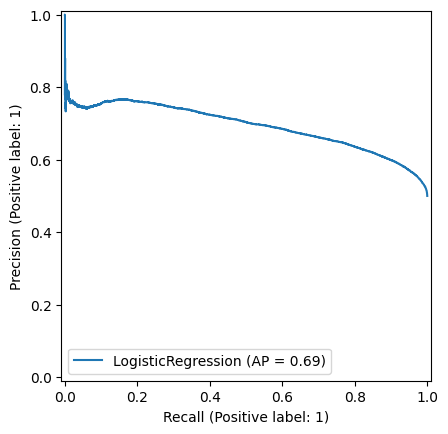

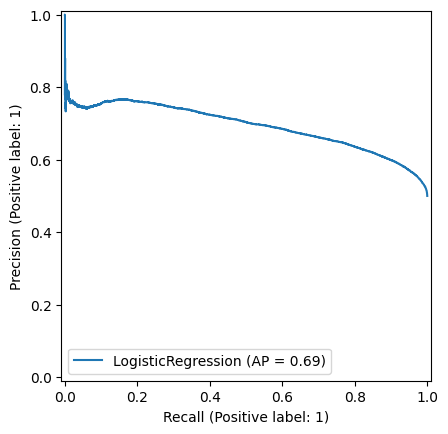

In [19]:
#ROS
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn import linear_model

oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X_train, y_train)

lr = linear_model.LogisticRegression()
lr.fit(X_over, y_over)
y_pred = lr.predict(X_test)
pr = PrecisionRecallDisplay.from_estimator(lr, X_over, y_over)
pr.plot()

0.36717752234993617
0.36717752234993617
-3.833157557121062
0.5994591759564432


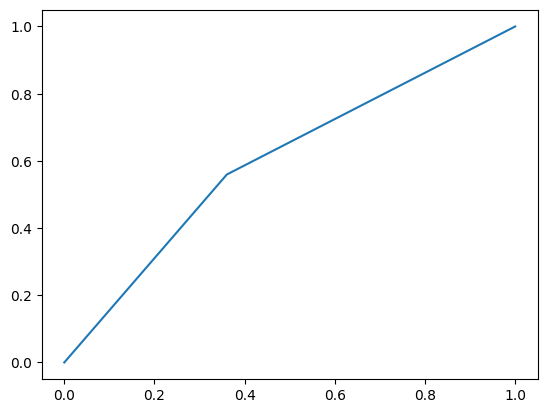

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

#Draw ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

In [21]:
print(y_over.value_counts())

is_promoted
0    40086
1    40086
Name: count, dtype: int64


[[6144 3910]
 [ 500  408]]
              precision    recall  f1-score   support

           0       0.92      0.61      0.74     10054
           1       0.09      0.45      0.16       908

    accuracy                           0.60     10962
   macro avg       0.51      0.53      0.45     10962
weighted avg       0.86      0.60      0.69     10962



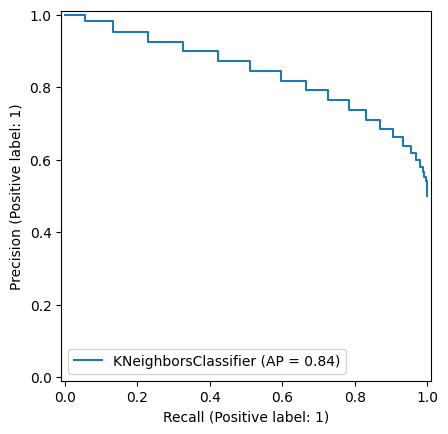

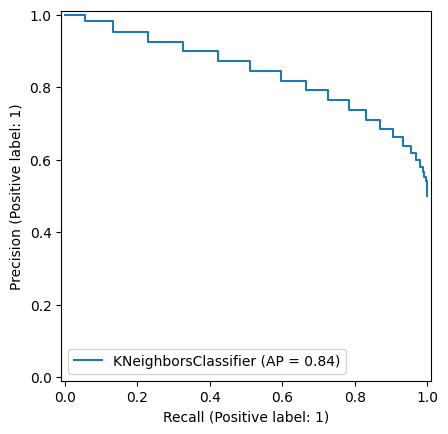

In [22]:
#find the best model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_over, y_over)
knn_gscv.best_params_

knn_gscv = KNeighborsClassifier(n_neighbors=24)
knn_gscv.fit(X_over, y_over)
y_pred = knn_gscv.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
pr = PrecisionRecallDisplay.from_estimator(knn_gscv, X_over, y_over)
pr.plot()


In [23]:
# Adasyn
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print(y_ada.value_counts())

is_promoted
0    40086
1    40086
Name: count, dtype: int64


In [24]:
#RUS
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(y_rus.value_counts())

is_promoted
0    40086
1    40086
Name: count, dtype: int64


In [25]:
#TomekLinks
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)
print(y_tl.value_counts())

is_promoted
0    40086
1    38876
Name: count, dtype: int64


In [26]:
#classification model KNN
knn = KNeighborsClassifier()
knn.fit(X_ada, y_ada)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[6684 3370]
 [ 550  358]]


In [28]:
#Forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
sfs = SFS(KNeighborsClassifier(), k_features=5, forward=True, floating=False, scoring='accuracy', cv=0)
sfs.fit(X_train, y_train)
sfs.k_feature_names_
sfs.k_score_

0.8631068203362771